# Why Affine Transformation?

Affine transformation is essential in understanding what happens in every layer in Deep Learning's (DL) neural networks (NN). Because you can imagine NN as an Affine Transformtion that's happening in every epoch; although we're not considering activation functions right now. I'll discuss those later. Additionally, if you watched Andrej Karpathy video ["Let's build GPT: from scratch, in code, spelled out."](https://www.youtube.com/watch?v=kCc8FmEb1nY) you'll notice him mentioning "affinities" couple of times. In NN these affinities happen in $\mathbb{R}^D$ while here we will explain it in $\mathbb{R}^2$ only.

If you're not familiar with affine transformation, it's essentially a mathematical operation involving matrices that performs specific transformations like rotation, scaling, or shearing. In linear algebra, an affine transformation is a way to map one point to another. For example, rotating a point from $(0,90)$ to $(-90,0)$ is considered an affine transformation, specifically a 90-degree counterclockwise rotation, which we'll demonstrate in this example.

In this tutorial, I chose an image as an example to explain the concept, because it will be easy to visualize and help building the intuition behind NN transformations to the input data $X$.

Let's begin!

**Affine transformation** are implemetned in linear algebra by using the following equation $Ax=b$.

In this equation, $x$ stands for our input, which, in this case, refers to the coordinates of an image. $A$ represents the transformation we want to apply, which, in this instance, is a 90-degree counterclockwise rotation. The specific matrix for this rotation is

$$A = \begin{bmatrix}
0 & -1 \\
1 & 0 \\
\end{bmatrix}$$

You might wonder how we arrived at this matrix $A$ Well, there are predefined transformation matrices, and one of them is for rotation. Rotation matrices are constructed using trigonometric functions; sine and cosine. If we substitute the angle "θ" with 90 degrees, we obtain matrix $A$ below:

$$ A = \begin{bmatrix}
\cosθ & -\sinθ \\
\sinθ & \cosθ \\
\end{bmatrix}$$

So, in this context, the image $x$ has a two-dimensional space, denoted as $\mathbb{R}^2$, because we are dealing with $x$ and $y$ coordinates. In neural networks, we often treat each pixel as a separate dimension, resulting in a multi-dimensional space $\mathbb{R}^d$ where $d$ represents the number of pixels.

# What Are We Going to Do?

So, we will use the equation $Ax = b$ to rotate the image. But how?

As mentioned earlier, $x$ represents our input, which, in this case, refers to the image's coordinates. Let's call these coordinates $xy$. The matrix $A \in \mathbb{R}^{2×2}$ serves as the transformation matrix, specifically a rotation matrix. $b$ will denote the new coordinates of the pixel values after the rotation, and we'll rename it $uv$ to represent these new image coordinates.

How can we represent $xy$ in a matrix?

To do this, let's consider a simple example, if we had an image of width 2 and height 2 to encompass every possible coordiante we can have $xy \in \mathbb{R}^{2\times (width \times height)}$:

$$xy = \begin{bmatrix}
x_0 & x_0 & x_1 & x_1 \\
y_0 & y_1 & y_0 & y_1 \\
\end{bmatrix}$$

In our example we are going to use an image that has a width of 183 and a height of 275. In this case, $xy \in \mathbb{R}^{2 x 50325}$ dimensional space, and $xy$ representation is going to be:

$$xy = \begin{bmatrix}
0 & 0 & 0 & ⋯ & 182 & 182 & 182  \\
0 & 1 & 2 & ⋯ & 272 & 273 & 274  \\
\end{bmatrix}$$


Now, when we perform the transformation with the equation $uv = Ax$, we obtain the new coordinate values $uv \in \mathbb{R}^{2 x 50325}$:

$$uv = \begin{bmatrix}
u_0 & u_0 & u_0 & ⋯ & u_{182} & u_{182} & u_{182}  \\
v_0 & v_1 & v_2 & ⋯ & v_{272} & v_{273} & v_{274}  \\
\end{bmatrix}$$



To better visualize the operation, please refer to *Figure 1* which illustrates a picture of a koala. We will use this koala image as an example to demonstrate a 90-degree rotation thru origin.

|<img src="https://drive.google.com/uc?id=1RSat76knFLHHNvzMjlV_A5gegeUKnYeI" width="500"/>|
|:---:|
|*Figure 1*|


After rotating the image it will look like *Figure 2*; note the pink coordinate (0,183) is mapped to (-274,0), this is what we are going to do to map all coordinates in $xy$ to $uv$.


|<img src="https://drive.google.com/uc?id=1RQxFE7rURNpLP-kl46Sa6cyzagcvMzpz" width="500"/>|
|:---:|
|*Figure 2*|

# How is this connected with NN?

You can think of what's happening here as a simple neural network with no hidden layers, depicted in the figure below. In this neural network, $x$ and
$y$ serve as our inputs, representing all the coordinates in the $xy$ matrix. The weights, denoted as $w$ will be updated through backpropagation to match our predefined matrix $A$. As you might have guessed, $u$ and $v$ are the outputs that validate the optimization process of the neural network.

In our specific case, we already knew how to rotate an image, so we had a predetermined matrix $A$. However, in modern Deep Learning problems $A = \begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
\end{bmatrix}$ is unknown and is computed thru NN.


|<img src="https://drive.google.com/uc?id=1RMdD290lYQxRWdywzAwbcjPl3q2lFSe2" width="500"/>|
|:---:|
|*Figure 3*|

You can argue that; this is not an NN because it's missing hidden layers and activation function. You're absolutely correct, this example is just for the sake of simplifying the concept. What we have done is more of a linear mapping, but we can generalize this concept to understand the transformation happening in more complicated NNs.


# Affine Transformation Code:

In [1]:
# load lib
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
import numpy as np

(183, 275)


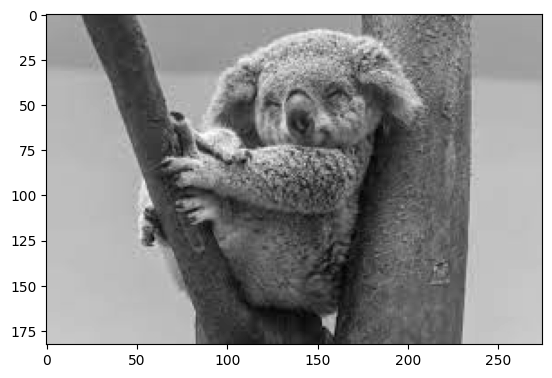

In [73]:
# load the image
image = Image.open('coala.jpeg').convert('L') # make it gray
# convert image to numpy array
data = np.asarray(image)
# summarize shape
print(data.shape)
pyplot.imshow(image, cmap='gray')
pyplot.show()

In [3]:
# uv = A @ xy
# uv is the new location of xy pixels
# A our transformation matrix in this case is going to be [[0,-1],[1,0]] for rotating an image by 90 degree
# xy is the original x,y coordinates of the image.

# Initialize xy & A
xy = []
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
    xy.append([i, j])

xy = np.array(xy, dtype=np.int32)
xy = xy.T

A = np.array([[0,-1],[1,0]])

In [4]:
# show xy
xy

array([[  0,   0,   0, ..., 182, 182, 182],
       [  0,   1,   2, ..., 272, 273, 274]], dtype=int32)

In [5]:
# find pixel coordinates after rotation
uv = A @ xy

In [56]:
# show uv
uv

array([[   0,   -1,   -2, ..., -272, -273, -274],
       [   0,    0,    0, ...,  182,  182,  182]])

In [10]:
# shift location of x to start from 0 instead of -274
uv[0,:] = uv[0,:] + abs(np.min(uv[0,:]))

In [11]:
# create an empty array to fill for the rotated image
affine_image = np.zeros_like(data.T)

In [12]:
# map pixel values in xy to uv (new location)
for i in range(xy.shape[1]):
  x,y = xy[:,i]
  u,v = uv[:,i]
  pixel_value = data[x,y]
  affine_image[u,v] = pixel_value

(183, 275)


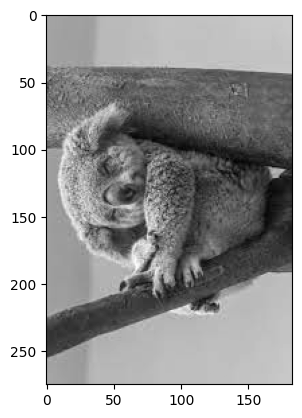

In [13]:
image2 = Image.fromarray(affine_image)
# summarize image details
print(image2.size)
pyplot.imshow(image2, cmap='gray')
pyplot.show()

# Defining Neural Network

In this NN example, our training data is $xy$ and labels are $uv$, and we are trying to find $A$ from NN's weights (same in figure 3), I'll be printing NN's weights at the end of every epoch and you'll notice that after couple of epochs the weights converge to our desired transformation matrix.

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2, 2)  # 2*2 our coordinate

    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
)


# Finding $A$ using Neural Networks

In [58]:
from torch.utils.data import TensorDataset, DataLoader
tensor_x = torch.Tensor(xy.T) # transform to torch tensor
tensor_y = torch.Tensor(uv.T)

training_set = TensorDataset(tensor_x,tensor_y) # create your datset
training_loader = DataLoader(training_set, batch_size=16, shuffle=True) # create your dataloader

In [60]:
import torch.optim as optim
from torch.autograd import Variable

net = Net()
net.train(True)

params = list(net.parameters())
print(f'params: {params[0]}')

# create your optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.MSELoss()

epochs = 20
for epoch in range(epochs):
  for i, data in enumerate(training_loader):

    # Every data instance is an input + label pair
    inputs, labels = data

    net.zero_grad()
    output = net(inputs)

    loss = criterion(output, labels)

    loss.backward()

    optimizer.step()

  print(f'epoch {epoch} loss: {loss}')
  params = list(net.parameters())
  print(f'epoch {epoch} params: {params[0]}')

params: Parameter containing:
tensor([[ 0.5846, -0.0512],
        [ 0.5716,  0.2121]], requires_grad=True)
epoch 0 loss: 6.736605644226074
epoch 0 params: Parameter containing:
tensor([[-0.0456, -0.9662],
        [ 0.9961, -0.0024]], requires_grad=True)
epoch 1 loss: 0.05768304318189621
epoch 1 params: Parameter containing:
tensor([[ 3.2694e-03, -9.9783e-01],
        [ 9.9868e-01, -8.3945e-04]], requires_grad=True)
epoch 2 loss: 0.025306036695837975
epoch 2 params: Parameter containing:
tensor([[ 2.7211e-03, -9.9816e-01],
        [ 9.9999e-01, -7.0359e-06]], requires_grad=True)
epoch 3 loss: 0.0017470133025199175
epoch 3 params: Parameter containing:
tensor([[ 9.5747e-04, -9.9940e-01],
        [ 1.0000e+00, -2.9435e-07]], requires_grad=True)
epoch 4 loss: 4.136971369916864e-07
epoch 4 params: Parameter containing:
tensor([[ 1.1748e-05, -9.9999e-01],
        [ 1.0000e+00,  1.3233e-07]], requires_grad=True)
epoch 5 loss: 1.591979548187794e-09
epoch 5 params: Parameter containing:
tensor(

# Trying matrix $A$ from NN

In [62]:
params = list(net.parameters())

In [65]:
# It converged well to the desired rotation matrix
A_nn = net.state_dict()['fc1.weight']

In [66]:
A_nn = np.array(A.tolist(), dtype=np.float64)

In [67]:
A_nn

array([[ 0., -1.],
       [ 1.,  0.]])

In [68]:
uv_nn = A_nn @ xy

In [69]:
# shift location of x to start from 0 instead of -274
uv_nn[0,:] = uv_nn[0,:] + abs(np.min(uv_nn[0,:]))

In [77]:
uv_nn = uv_nn.astype(int) # numpy cannot handle float indices (cascade to int)

In [78]:
affine_image = np.zeros_like(data.T)

In [81]:
for i in range(xy.shape[1]):
  x,y = xy[:,i]
  u,v = uv_nn[:,i]
  pixel_value = data[x,y]
  affine_image[u,v] = pixel_value

(183, 275)


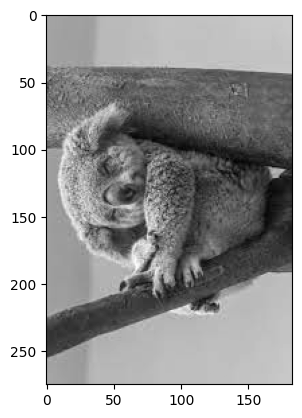

In [82]:
image_nn = Image.fromarray(affine_image)
# summarize image details
print(image_nn.size)
pyplot.imshow(image_nn, cmap='gray')
pyplot.show()

# Conclusion

So this was a tutorial to explain the underlying mechanism of NNs, and the actual meaning of the weight updates that are backprobagated while training NNs. I hope you enjoyed and had a mouth opening moment, as I had when I understood this.

Thanks for reading